# Chapter 5 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Sampling for Estimation of Finite Population Quantities

In [2]:
import random
import numpy as np
import pingouin as pg
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import mistat

## Sampling and the Estimation Problem

### Basic Definitions

### Drawing a Random Sample from a Finite Population

In [3]:
random.sample(range(1, 101), k=10)

[51, 35, 30, 53, 76, 54, 72, 12, 74, 36]

### Sample Estimates of Population Quantities and their Sampling Distribution

In [4]:
# range is a generator and needs to be converted to a list
X = list(range(1, 101))
Xsample = random.choices(X, k=20)

In [5]:
df = pd.DataFrame({f'sample {i}': random.choices(X, k=20)
                  for i in range(1, 5)})
df.agg(['mean', 'std'])

,sample 1,sample 2,sample 3,sample 4
mean,55.150000,49.650000,50.450000,45.800000
std,25.508048,29.050365,30.013111,24.718627


In [6]:
np.random.seed(1)

X = list(range(100))

# compute_bootci creates samples of the same size as the population
# as we are interested in a smaller sample of size 20, we ignore the
# remaining values when we calculate the mean
def stat_func(sample):
    return np.mean(sample[:20])

B = pg.compute_bootci(X, func=stat_func, n_boot=1000,
                      return_dist=True, seed=1)
print('Mean values of first three mean values: ', B[1][:3])
pd.cut(B[1], bins=12).value_counts()

Mean values of first three mean values:  [61.15 46.25 55.15]


(30.907, 34.529]      6
(34.529, 38.108]     30
(38.108, 41.688]     79
(41.688, 45.267]    137
(45.267, 48.846]    191
(48.846, 52.425]    226
(52.425, 56.004]    172
(56.004, 59.583]    101
(59.583, 63.163]     42
(63.163, 66.742]     13
(66.742, 70.321]      2
(70.321, 73.9]        1
dtype: int64

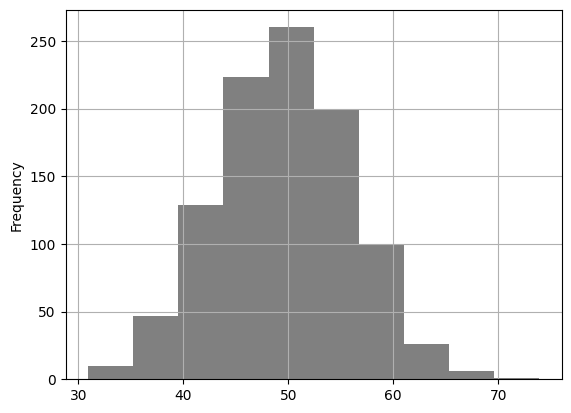

In [7]:
ax = pd.Series(B[1]).hist(color='grey')
ax.set_ylabel('Frequency')
plt.show()

## Estimation with Simple Random Samples

In [8]:
random.seed(2)
population = list(range(1, 101))

# create samples of size 20 and collect mean and standard deviation
rswr = {'mean': [], 'var': []}
rswor = {'mean': [], 'var': []}
for _ in range(100):
    sample = np.array(random.choices(population, k=10))
    rswr['mean'].append(sample.mean())
    rswr['var'].append(sample.var(ddof=1))

    sample = np.array(random.sample(population, k=10))
    rswor['mean'].append(sample.mean())
    rswor['var'].append(sample.var(ddof=1))

# calculate mean and standard deviation of sample estimates
from collections import namedtuple
SampleStats = namedtuple('SampleStats', 'X10,S2_10')
def calcStats(values):
    return SampleStats(np.mean(values), np.std(values, ddof=1))
rswr['mean'] = calcStats(rswr['mean'])
rswr['var'] = calcStats(rswr['var'])
rswor['mean'] = calcStats(rswor['mean'])
rswor['var'] = calcStats(rswor['var'])

In [9]:
print('RSWR')
print(f" Est. mean: {rswr['mean'].X10:.2f} / {rswr['mean'].S2_10:.3f}")
print(f" Est. var : {rswr['var'].X10:.2f} / {rswr['var'].S2_10:.2f}")
print('RSWOR')
print(f" Est. mean: {rswor['mean'].X10:.2f} / {rswor['mean'].S2_10:.3f}")
print(f" Est. var : {rswor['var'].X10:.2f} / {rswor['var'].S2_10:.2f}")

RSWR
 Est. mean: 51.60 / 10.684
 Est. var : 802.65 / 243.01
RSWOR
 Est. mean: 50.44 / 8.388
 Est. var : 828.04 / 252.10


### Properties of $\bar X_n$ and $S^2_n$ under RSWR

In [10]:
place = mistat.load_data('PLACE')
xDev = place['xDev'] / 1e-3
N = len(xDev)
mu_N = xDev.mean()
sigma2_N = xDev.var(ddof=0)
mu_3N = np.sum((xDev - mu_N) ** 3) / N
mu_4N = np.sum((xDev - mu_N) ** 4) / N
print(mu_N.round(4))
print(sigma2_N.round(5))
print(mu_3N.round(5))
print(mu_4N.round(3))

0.9124
2.91992
-0.98326
14.655


### Properties of $\bar X_n$ and $S^2_n$ under RSWOR

In [11]:
random.seed(1)
X = list(range(1, 101))

def confInt(x, p, N):
    if p >= 0.5:
        p = 1 - (1 - p) / 2
    else:
        p = 1 - p / 2

    n = len(x)
    z = stats.norm.ppf(p) * np.sqrt(1 - (n-1)/(N-1)) / np.sqrt(n)
    m = np.mean(x)
    s = np.std(x, ddof=1)
    return (m - z * s, m + z * s)

sampled_confInt = []
for _ in range(1000):
    sample = random.sample(X, k=30)
    sampled_confInt.append(confInt(sample, p=0.95, N=100))

# show the first three results
print(sampled_confInt[:3])

# calculate the ratio of cases where the actual mean of 50.5
# is inside the sample confidence intervals
proportion_coverage = sum(ci[0] < 50.5 < ci[1] for ci in sampled_confInt)
proportion_coverage = proportion_coverage / len(sampled_confInt)
print(proportion_coverage)

[(36.85179487364511, 55.14820512635489), (44.070802021276585, 60.795864645390076), (43.237002670283765, 59.56299732971623)]
0.943


## Estimating the Mean with Stratified RSWOR

## Proportional and Optimal Allocation

## Prediction Models with Known Covariates

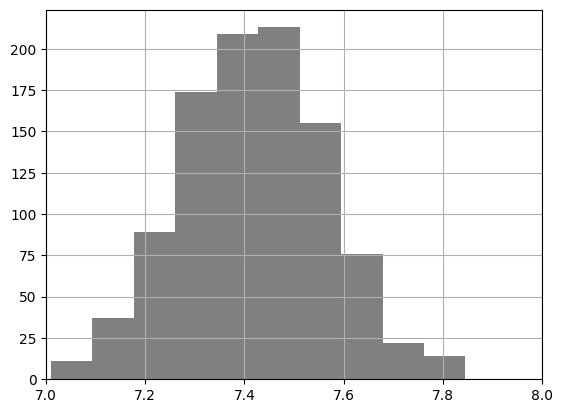

In [12]:
pred = mistat.load_data('PRED')

def stat_func(x):
    return np.mean(x[:100]) * 0.05

B = pg.compute_bootci(pred['x'], func=stat_func, n_boot=1000, return_dist=True, seed=1)
ax = pd.Series(B[1]).hist(color='grey')
ax.set_xlim(7, 8)
plt.show()

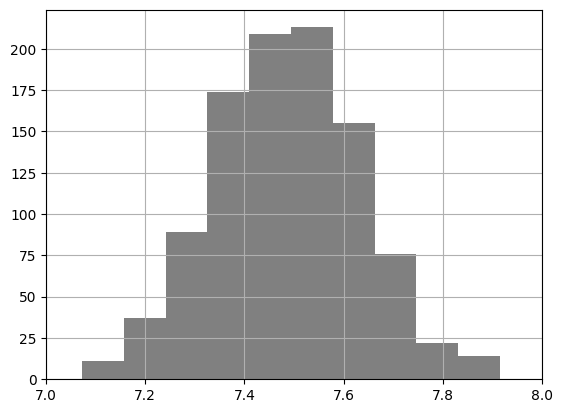

In [13]:
pred = mistat.load_data('PRED')

def stat_func(x):
    return np.mean(x[:100]) * 7.495 / 148.58

B = pg.compute_bootci(pred['x'], func=stat_func, n_boot=1000, return_dist=True, seed=1)
ax = pd.Series(B[1]).hist(color='grey')
ax.set_xlim(7, 8)
plt.show()

## Chapter Highlights

## Exercises